In [31]:
from netCDF4 import Dataset
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [12]:
def find_data(region, year, tech):
    
    cf = np.average(Dataset(str(year)+'_'+tech+'_generation_cf.nc').variables['cf'][1::2,1::2],axis=2)
    elcc = Dataset('../wecc_results.nc').variables[region+' '+str(year)+' 1 GW '+tech][:]
    
    return cf, elcc

In [23]:
def find_corr(cf, elcc):
    return np.corrcoef(elcc.flatten(),cf.flatten())[0,1]

In [48]:
def plot_corr(ax, region, year, tech):
    cf, elcc = find_data(region, year, tech)
    r = find_corr(cf,elcc)
    ax.scatter(elcc,cf,c='#000000',s=1)
    ax.set_xlabel('ELCC')
    ax.set_ylabel('Average CF')
    ax.set_title(' '.join([region.capitalize(),str(year),tech.capitalize(),'Pearson Coeff:',str(round(r,3))]))


In [56]:
correlation = pd.DataFrame()

In [57]:
for region in ['basin','california','mountains','northwest','southwest']:
    for year in [2016,2017,2018]:
        for tech in ['solar','wind']:
            cf, elcc = find_data(region,year,tech)
            correlation.at[region,' '.join([str(year),tech])] = find_corr(cf,elcc) 

In [58]:
correlation.to_csv('average_cf_correlation.csv')

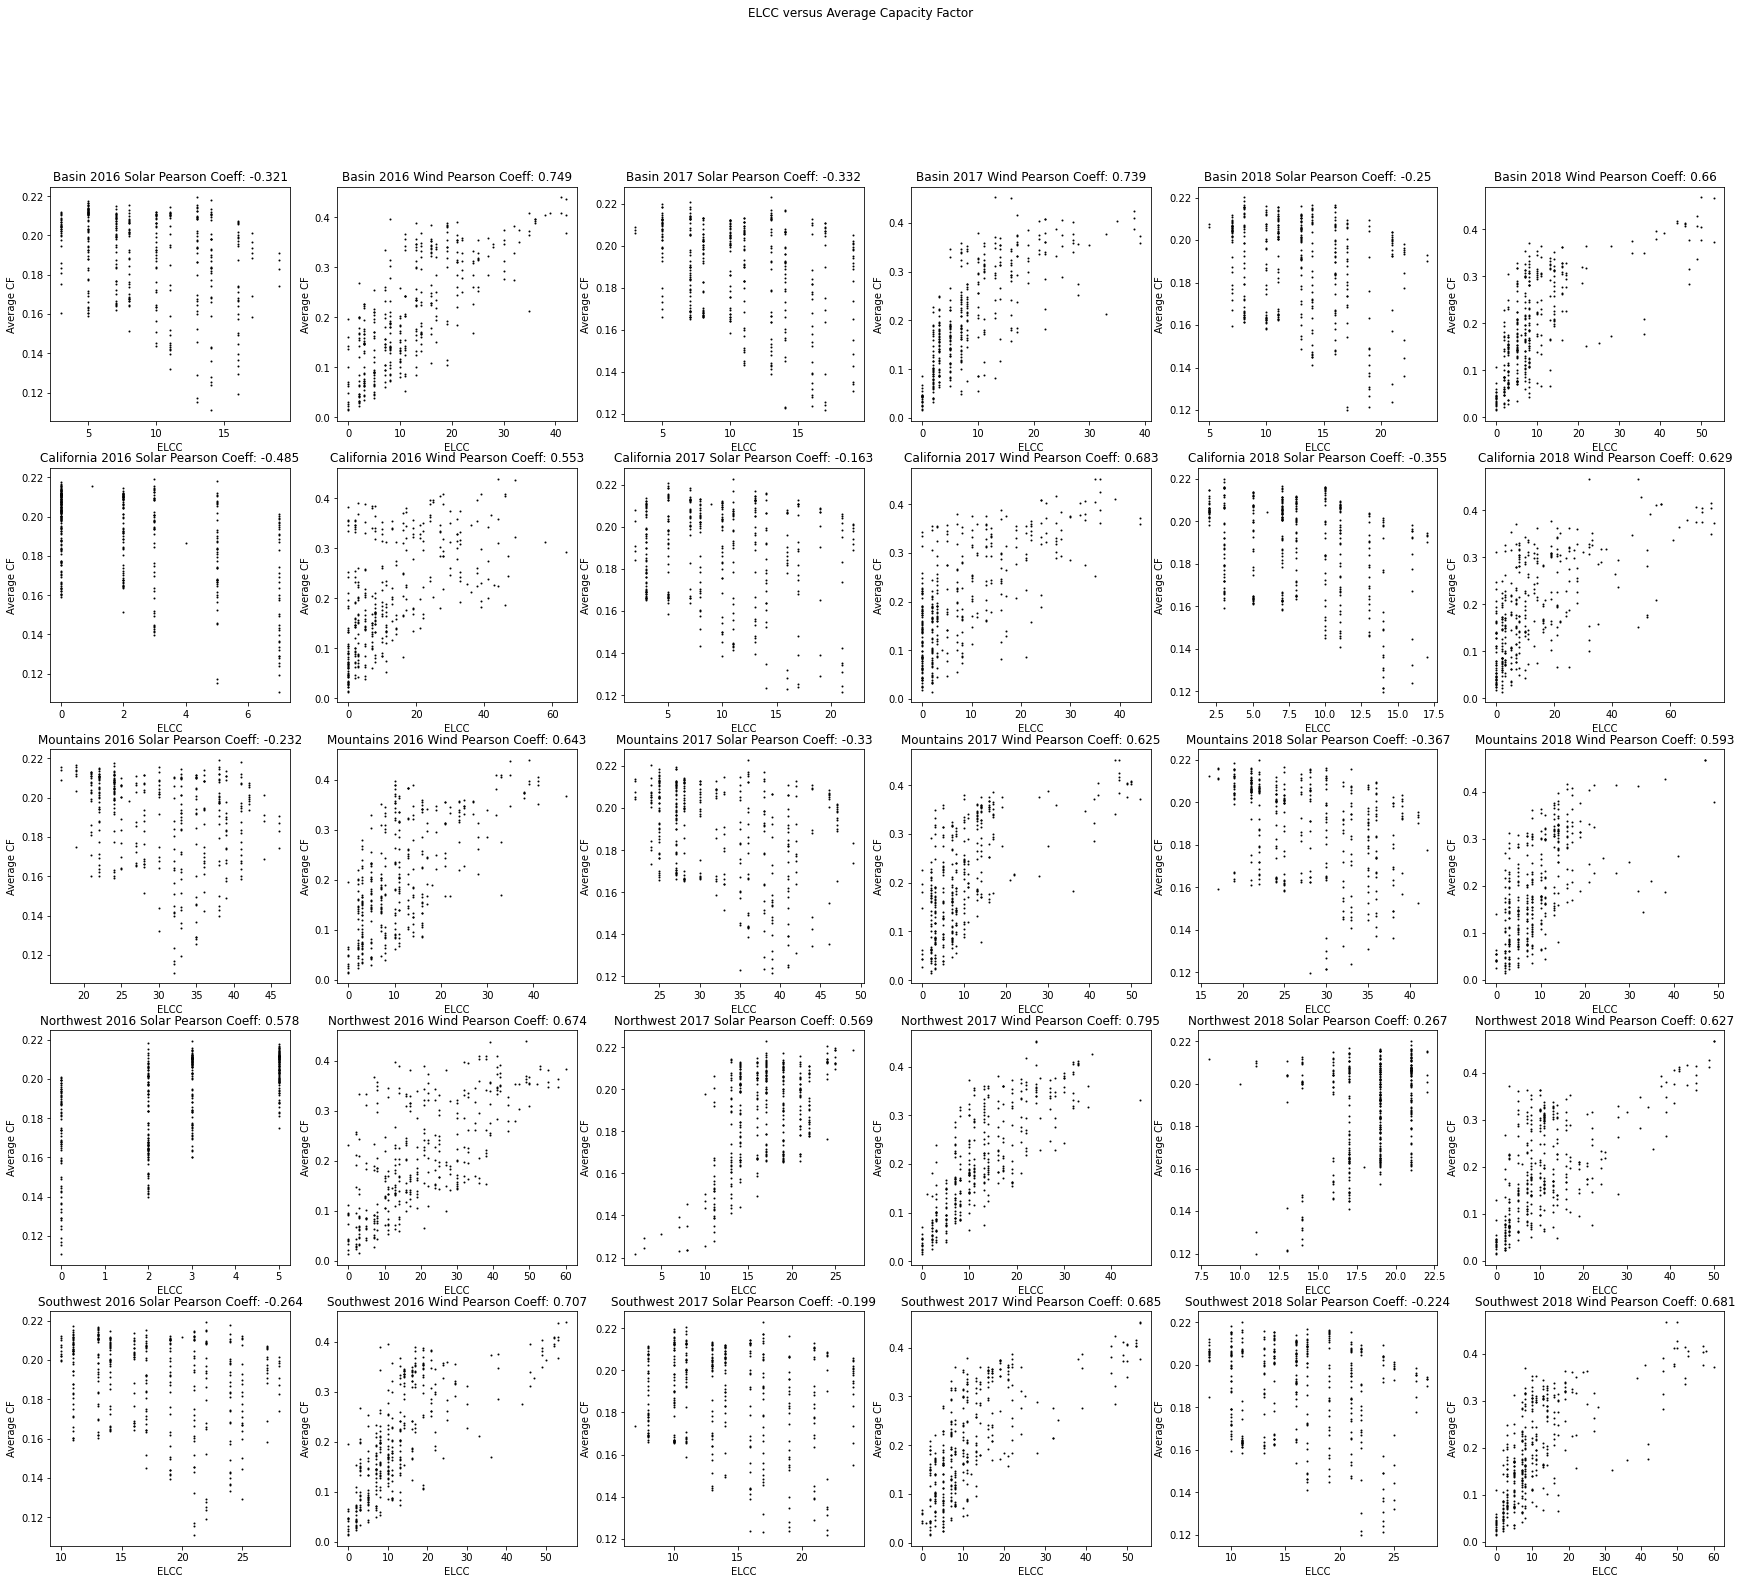

In [53]:
fig, axs = plt.subplots(5,6,figsize=(30,25))

i = 0
for region in ['basin','california','mountains','northwest','southwest']:
    for year in [2016,2017,2018]:
        for tech in ['solar','wind']:
            plot_corr(axs[i // 6, i % 6],region,year,tech)
            i += 1

plt.suptitle('ELCC versus Average Capacity Factor')
plt.savefig('average_cf_correlation.png')